In [4]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the forward pass for the one-layer, one-neuron network
def forward_pass(x, w, b):
    z = np.dot(x, w) + b  # Linear combination
    a = sigmoid(z)       # Apply activation function
    return a

# Example input, weight, and bias
x = np.array([1.0, 2.0])  # Input vector
w = np.array([0.5, -0.5]) # Weight vector
b = 0.1                  # Bias

# Perform the forward pass
output = forward_pass(x, w, b)
print("Output of the one-layer, one-neuron network:", output)

Output of the one-layer, one-neuron network: 0.401312339887548


In [5]:
# Define the ReLU activation function
def relu(z):
    return np.maximum(0, z)

# Forward pass
def forward_pass_relu(x, w, b):
    z = np.dot(x, w) + b
    a = relu(z)
    return a

# Example usage
output = forward_pass_relu(x, w, b)
print("ReLU Output:", output)


ReLU Output: 0.0


In [6]:
# Define the tanh activation function
def tanh(z):
    return np.tanh(z)

# Forward pass
def forward_pass_tanh(x, w, b):
    z = np.dot(x, w) + b
    a = tanh(z)
    return a

# Example usage
output = forward_pass_tanh(x, w, b)
print("Tanh Output:", output)


Tanh Output: -0.3799489622552249


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input layer with 10 units and ReLU activation
model.add(Dense(10, input_dim=8, activation='relu'))

# Hidden layer with 5 units and ReLU activation
model.add(Dense(5, activation='relu'))

# Output layer with 1 unit and Sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes for multi-class classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input layer with 10 units and ReLU activation
model.add(Dense(10, input_dim=8, activation='relu'))

# Hidden layer with 5 units and tanh activation
model.add(Dense(5, activation='tanh'))

# Output layer with 1 unit and Sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                90        
                                                                 
 dense_19 (Dense)            (None, 5)                 55        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()

# Input layer with 10 units and ReLU activation
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer with 5 units and tanh activation
model.add(Dense(5, activation='tanh'))

# Output layer with 1 unit and Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20,  # Number of epochs
                    batch_size=16,  # Batch size
                    validation_split=0.2,  # Fraction of data to be used as validation data
                    verbose=1)  # Verbosity mode (1 for progress bar)

# Evaluate the model on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary outcomes

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                310       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 1s 18ms/step - loss: 0.5330 - accuracy: 0.6978 - val_loss: 0.4625 - val_accuracy: 0.8132
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4606 - accuracy: 0.8214 - val_loss: 0.4085 - val_accuracy: 0.8681
Epoch 3

In [16]:
import matplotlib.pyplot as plt

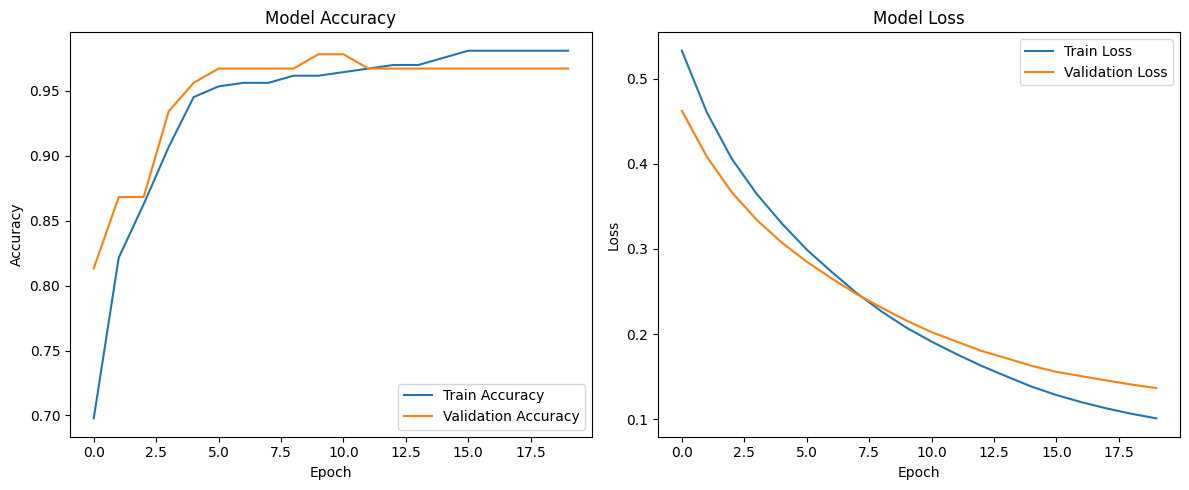

In [17]:
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()